In [10]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import os
import numpy as np
import matplotlib.pyplot as plt

In [11]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of Y_train: {Y_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of Y_test: {Y_test.shape}")

11501568/11490434 [==============================] - 0s 0us/step
Shape of X_train: (60000, 28, 28)
Shape of Y_train: (60000,)
Shape of X_test: (10000, 28, 28)
Shape of Y_test: (10000,)


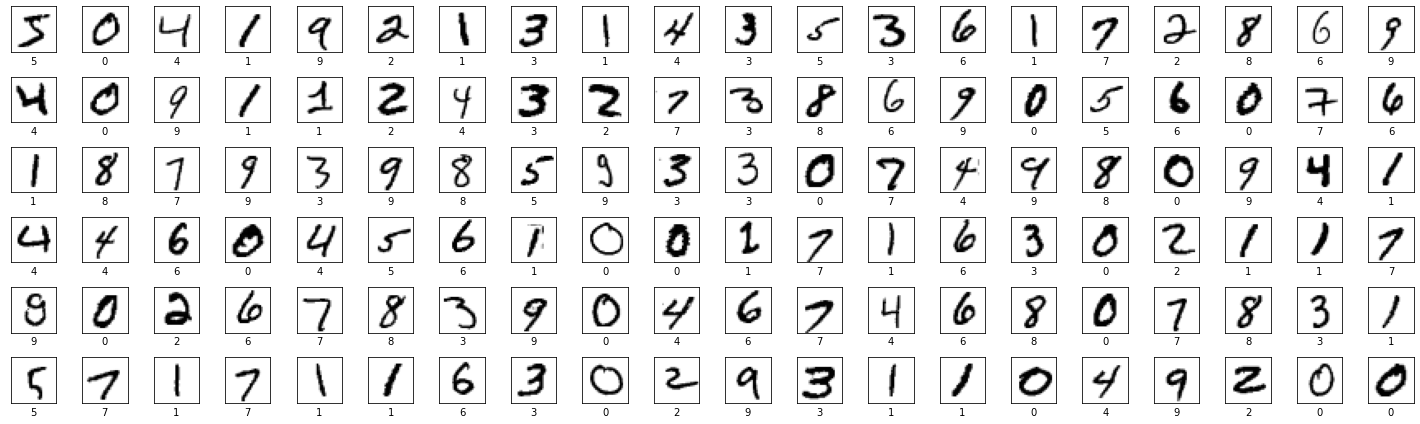

In [12]:
ROWS = 6
COLS = 20
i = 0
plt.figure(figsize=(20,6))
for r in range(ROWS):
    for c in range(COLS):
        plt.subplot(ROWS, COLS, i+1)
        plt.imshow(X_train[i], cmap=plt.cm.gray_r)
        plt.xticks([])
        plt.yticks([])
        plt.xlabel(Y_train[i])
        i += 1
plt.tight_layout()
plt.show()

In [13]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)
X_train, X_test = X_train / 255.0, X_test / 255.0

In [14]:
model = keras.Sequential([
    keras.Input(shape=(28,28,1)),
    layers.Conv2D(filters=32, kernel_size=(5,5), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 1, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 64)                0

In [15]:
model.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [16]:
h = model.fit(x=X_train, y=Y_train, epochs=5, validation_split=0.2, batch_size=38)

Epoch 1/5
1264/1264 [==============================] - 44s 34ms/step - loss: 0.2313 - accuracy: 0.9294 - val_loss: 0.0876 - val_accuracy: 0.9743
Epoch 2/5
1264/1264 [==============================] - 43s 34ms/step - loss: 0.0727 - accuracy: 0.9778 - val_loss: 0.0642 - val_accuracy: 0.9802
Epoch 3/5
1264/1264 [==============================] - 44s 34ms/step - loss: 0.0506 - accuracy: 0.9840 - val_loss: 0.0555 - val_accuracy: 0.9832
Epoch 4/5
1264/1264 [==============================] - 44s 35ms/step - loss: 0.0389 - accuracy: 0.9878 - val_loss: 0.0589 - val_accuracy: 0.9831
Epoch 5/5
1264/1264 [==============================] - 45s 36ms/step - loss: 0.0328 - accuracy: 0.9896 - val_loss: 0.0464 - val_accuracy: 0.9877


In [17]:
model.compile(
   optimizer='RMSProp', 
   loss='sparse_categorical_crossentropy', 
   metrics=['accuracy']
 )

In [18]:
h = model.fit(x=X_train, y=Y_train, epochs=5, validation_split=0.2, batch_size=38)

Epoch 1/5
1264/1264 [==============================] - 44s 34ms/step - loss: 0.0255 - accuracy: 0.9923 - val_loss: 0.0551 - val_accuracy: 0.9871
Epoch 2/5
1264/1264 [==============================] - 43s 34ms/step - loss: 0.0203 - accuracy: 0.9939 - val_loss: 0.0462 - val_accuracy: 0.9887
Epoch 3/5
1264/1264 [==============================] - 43s 34ms/step - loss: 0.0171 - accuracy: 0.9947 - val_loss: 0.0449 - val_accuracy: 0.9898
Epoch 4/5
1264/1264 [==============================] - 43s 34ms/step - loss: 0.0162 - accuracy: 0.9955 - val_loss: 0.0575 - val_accuracy: 0.9883
Epoch 5/5
1264/1264 [==============================] - 44s 35ms/step - loss: 0.0138 - accuracy: 0.9960 - val_loss: 0.0493 - val_accuracy: 0.9910


In [20]:
model.compile(
   optimizer='SGD', 
   loss='sparse_categorical_crossentropy', 
   metrics=['accuracy']
 )

In [21]:
h = model.fit(x=X_train, y=Y_train, epochs=5, validation_split=0.2, batch_size=38)

Epoch 1/5
1264/1264 [==============================] - 42s 33ms/step - loss: 0.0039 - accuracy: 0.9988 - val_loss: 0.0414 - val_accuracy: 0.9924
Epoch 2/5
1264/1264 [==============================] - 42s 33ms/step - loss: 0.0025 - accuracy: 0.9993 - val_loss: 0.0422 - val_accuracy: 0.9920
Epoch 3/5
1264/1264 [==============================] - 42s 33ms/step - loss: 0.0019 - accuracy: 0.9996 - val_loss: 0.0430 - val_accuracy: 0.9922
Epoch 4/5
1264/1264 [==============================] - 42s 33ms/step - loss: 0.0015 - accuracy: 0.9996 - val_loss: 0.0431 - val_accuracy: 0.9917
Epoch 5/5
1264/1264 [==============================] - 43s 34ms/step - loss: 0.0013 - accuracy: 0.9996 - val_loss: 0.0440 - val_accuracy: 0.9917


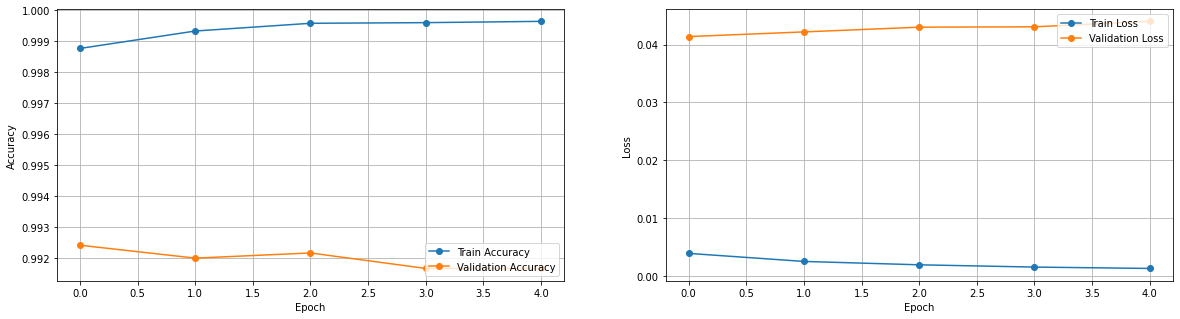

In [22]:
plt.figure(figsize=(20,5))
plt.subplot(1, 2, 1)
plt.plot(h.history['accuracy'], 'o-', label='Train Accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')
plt.subplot(1, 2, 2)
plt.plot(h.history['loss'], 'o-', label='Train Loss')
plt.plot(h.history['val_loss'], 'o-', label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')
plt.show()

In [23]:
test_loss, test_acc = model.evaluate(X_test, Y_test)
print('\nTest Accuracy:', test_acc)
print('\nTest Loss:', test_loss)

313/313 [==============================] - 3s 8ms/step - loss: 0.0324 - accuracy: 0.9922

Test Accuracy: 0.9922000169754028

Test Loss: 0.0323898121714592
